# **Car Price Analysis in Advertising Industry**

# What are that can be a selling point to a car?

I'm an analyst at Crankshaft List. Hundreds of free vehicle ads are served on company website every day. I need to study datasets over the last few years and determine the factors that influence the price of a vehicle.

I need to study datasets over the last few years and determine the factors that influence the price of a vehicle.

Here are the steps:

**Step 1. Open data file and learn the general information**

File path: `/content/vehicles_us.csv`.

**Step 2. Data pre-processing**
- Check and learn from the missing values:
  - In some cases there is a clear way to replace missing values. For example, if a Boolean column contains only `True` values, it is reasonable to assume that the missing values are `False` values. However, this method cannot be used to fix other data types, and there may occasionally be cases where significant missing values can be found. In such a case, don't fill in the value.
  - If needed, fill in the value. Explain why you choose to do so and how you choose the replacement value.
  - Describe the factors that may have contributed to the loss of value.

- Convert datatypes to a correct one:
   - Indicate which column whose data type needs to be changed and explain why.

**Step 3. Calculate and add the following points to the table:**
- Day of the week, month and year the ad was served
- The age of the vehicle (in years) when the ad was shown
- Average vehicle mileage per year

In the `condition` column, replace the string value with a numeric scale:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

**Step 4. Perform exploratory data analysis, by following below instructions:**
- Study the following parameters: price, age of the vehicle when the ad was shown, mileage, number of cylinders and condition. Make a histogram for each of these parameters. Learn how outliers affect histogram shape and its readability.

- Define the upper bound of the outliers, remove the outliers and store them in a separate DataFrame, then continue your work with the filtered data.

- Use filtered data to create new histograms. Compare with the previous histogram (the histogram which contains outliers). Draw conclusions for each histogram.

- Learn how many days an ad is served (`days_listed`). Create a histogram. Calculate the mean and median. Describe how long an ad is generally displayed. Decide when ads are removed quickly, and when ads are served for a very long time.

- Analysis of the number of ads and the average price of each type of vehicle. Create a graph to show the dependency of the number of ads on the type of vehicle. Choose two types of vehicles which has the most number of ads.

- What are the factors that has the most influence the price of a vehicle? Take each of the popular vehicle types we've found in the previous stages and learn whther if their prices depends on their age, mileage, condition, transmission type, and color. Create a boxplot graph for the categorical variables (transmission type and color), then make a scatterplot for the rest. When analyzing categorical variables, remember that a category must have at least 50 ads. Otherwise, the parameters will not be valid to use for analysis.

**Step 5. Write the overall conclusion**

**Data Description**:
Your dataset contains the following columns:
- `price` - vehicle price
- `model_year` - production year
- `model` - model / vehicle type
- `condition` - vehicle condition
- `cylinders` - vehicle total cylinders
- `fuel` — gas, diesel, etc.
- `odometer` — vehicle mileage when the ad is displayed
- `transmission` - vehicle transmission type
- `paint_color` - vehicle color
- `is_4wd` — does the vehicle have 4 wheel drive (Boolean datatype)
- `date_posted` — the date the ad was shown
- `days_listed` — the number of days the ad served until it was removed



## Initialization

Load *libraries* that you needed for this project. You'll probably notice that you need additional *libraries* once you've worked on this project, and that's normal. Just be sure to update this section if needed.

In [3]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#for importing files to google collab
from google.colab import files

In [4]:
#upload datasets
#uploaded = files.upload()

### Load Data

Load the dataset and read the general information.

In [5]:
# load file to dataframe
df = pd.read_csv(r'/content/vehicles_us.csv')

### Explore Dataset

The *Dataset* contains the following fields:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, and etc.
- `odometer` — vehicle mileage when the ad is displayed
- `transmission`
- `paint_color`
- `is_4wd` — does the vehicle have 4 wheel drive (Boolean datatype)
- `date_posted` — the date when the ad was shown
- `days_listed` — the number of days when the ad served until it was removed


In [6]:
# show the general information/summary about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
# show the sample data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [8]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [9]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

There is a total of 51525 rows of data. However, there is some data that has null value in the following columns:
- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

There are columns with incorrect datatype in the following columns:
- `model_year`
- `cylinders`
- `is_4wd`
- `odometer`
- `days_listed`

There are columns with abnormal values in the following columns:
- `model_year`
- `cylinders`
- `is_4wd`
- `odometer`
- `days_listed`

To find out more details we need to do a further investigation

There are columns with incorrect datatype in the following columns:
- `model_year`
- `cylinders`
- `is_4wd`
- `odometer`
- `days_listed`

**Conclusion**

There are 5 columns that have missing values. With the most values in the `is_4wd` column

In [10]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Conclusions and Next Steps

After doing a data exploration on the dataset `/content/vehicles_us.csv`. There is a total of 51525 rows of data. However, there is some data that has null value in the following columns:
- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

There are columns with incorrect datatype in the following columns:
- `model_year`
- `cylinders`
- `is_4wd`
- `odometer`
- `days_listed`

There are columns with abnormal values in the following columns:
- `model_year`
- `cylinders`
- `is_4wd`
- `odometer`
- `days_listed`


The next steps are as follows:
- Fill in the missing values
- Fix the datatype
- Improve data quality
- Review the cleaned data
- Learn the core parameters
- Learn and deal with outliers
- Learn core parameters without outliers
- Ads validity period
- The average price of each type of the vehicle
- Price factor
- General conclusion

## Deal with Missing Values (If Any)

**Step 2. Data pre-processing**
- Check and learn from the missing values:
  - In some cases there is a clear way to replace missing values. For example, if a Boolean column contains only `True` values, it is reasonable to assume that the missing values are `False` values. However, this method cannot be used to fix other data types, and there may occasionally be cases where significant missing values can be found. In such a case, don't fill in the value.
  - If needed, fill in the value. Explain why you choose to do so and how you choose the replacement value.
  - Describe the factors that may have contributed to the loss of value.

In [11]:
# function to fill missing values, fill with median value
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [12]:
# function to fill missing values, fill with mean value
def fill_missing_value2 (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [13]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [14]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [15]:
df['model_year'].median()

2011.0

In [16]:
df.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

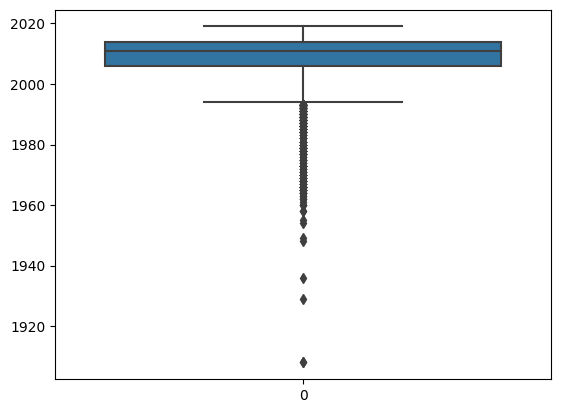

In [17]:
sns.boxplot(df['model_year']); #we've found too many outliers, so we decide to use median

In [18]:
df.describe()[['model_year']]#check outliers

,model_year
count,47906.000000
mean,2009.750470
std,6.282065
min,1908.000000
25%,2006.000000
50%,2011.000000
75%,2014.000000
max,2019.000000


In [19]:
fill_missing_value(df, 'model', 'model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


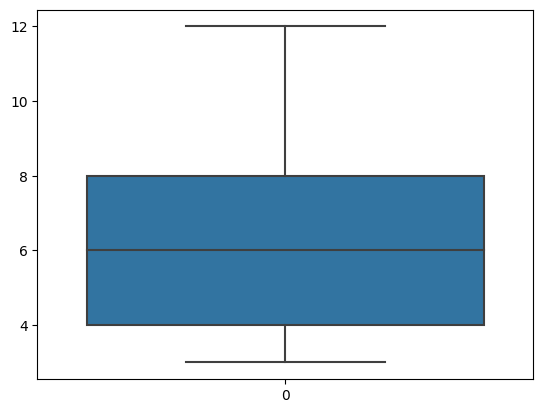

In [20]:
sns.boxplot(df['cylinders']); #we've found the outliers is only a few, so we can fill with mean

In [21]:
df.describe()[['cylinders']]#check outliers

,cylinders
count,46265.000000
mean,6.125235
std,1.660360
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,12.000000


In [22]:
df.groupby('transmission')['cylinders'].mean()

transmission
automatic    6.118827
manual       5.675386
other        6.991369
Name: cylinders, dtype: float64

In [23]:
fill_missing_value2(df, 'transmission', 'cylinders')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [24]:
df['paint_color'] = df['paint_color'].fillna('unknown') #the column has string datatype, we can fill the missing value with `unknown`

In [25]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

**Conclusion**

For the `is_4wd` column, the datatype is boolean, so we can use the fillna() function to fill column that has False value

In [26]:
df['is_4wd'] = df['is_4wd'].fillna(0).astype('int')

In [27]:
df = fill_missing_value(df, 'condition', 'odometer')

In [28]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

**Conclusions**

The missing values already been filled

## Fixing Datatype

**Step 2. Data pre-processing**
- Convert datatypes to a correct one:
   - Indicate which column whose datatype needs to be changed and explain why.

In [29]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd            int64
date_posted      object
days_listed       int64
dtype: object

In [30]:
# Change the datatype in the `date_posted` column to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [31]:
# Change the datatype in the `model_year` column to int
df['model_year'] = df['model_year'].astype('int')

In [32]:
# Change the datatype in the `cylinders` column to int
df['cylinders'] = df['cylinders'].astype('int')

In [33]:
# Change the datatype in the `odometer` column to int
df['odometer'] = df['odometer'].astype('int')

In [34]:
# Change the datatype in column `is_4wd` to bool
df['is_4wd'] = df['is_4wd'].astype('bool')

In [35]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [36]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71


**Conclusions**

Datatype already been fixed

## Fixing Data Quality

**Step 3. Calculate and add the following to the table:**

- Day of the week, month and year the ad was served
- The age of the vehicle (in years) when the ad was shown
- Average vehicle mileage per year

In the `condition` field, replace the string value with a numeric scale:

- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [37]:
# Add the time and date values at the time the ad was shown
df['week_posted'] = df['date_posted'].dt.week # day of the week the ad was shown

In [38]:
df['month_posted'] = df['date_posted'].dt.month # day of the month the ad was shown

In [39]:
df['year_posted'] = df['date_posted'].dt.year # day of the year the ad was shown

In [40]:
# Add the age of the vehicle when the ad is shown
df['age_car'] = df['year_posted'] - df['model_year']

In [41]:
df['age_car'] = df['age_car'].replace(0, 1) # for age_car under 1 year can be rounded up to 1 year

In [42]:
df[df['age_car']==1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,age_car
13,16500,2018,hyundai sonata,excellent,4,gas,22104,automatic,sedan,silver,False,2019-01-14,29,3,1,2019,1
19,13990,2018,hyundai elantra,excellent,4,gas,31932,automatic,sedan,red,False,2018-08-25,27,34,8,2018,1
25,11499,2017,chevrolet malibu,like new,4,gas,72982,automatic,sedan,unknown,False,2018-07-26,43,30,7,2018,1
31,11999,2017,toyota camry le,excellent,4,gas,35721,automatic,sedan,unknown,False,2018-09-13,25,37,9,2018,1
41,11995,2017,nissan rogue,like new,4,gas,72982,automatic,SUV,silver,True,2018-09-20,21,38,9,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51446,15999,2018,chevrolet malibu,excellent,4,gas,50502,automatic,sedan,black,False,2018-07-28,8,30,7,2018,1
51447,33990,2019,ram 1500,excellent,8,gas,9000,automatic,truck,white,True,2019-01-25,36,4,1,2019,1
51450,16950,2018,subaru forester,excellent,4,gas,104230,automatic,SUV,grey,True,2019-02-01,17,5,2,2019,1
51475,17980,2017,subaru outback,excellent,4,gas,78468,automatic,SUV,white,True,2018-11-16,9,46,11,2018,1


In [43]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,age_car
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,25,6,2018,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,42,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,12,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14,4,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,40,10,2018,5
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,46,11,2018,16
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,46,11,2018,9
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,27,7,2018,5


In [44]:
# Add the average vehicle mileage per year
df['avg_odometer'] = df['odometer'] / df['age_car']

In [45]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,week_posted,month_posted,year_posted,age_car,avg_odometer
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.106511,115199.007278,39.55476,26.873498,6.628491,2018.307462,8.555672,18930.819247
std,10040.803015,6.099381,1.576082,60484.868232,28.20427,15.138854,3.474134,0.461447,6.057829,16268.508904
min,1.000000,1908.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,13.000000,3.000000,2018.000000,4.000000,10423.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,27.000000,7.000000,2018.000000,8.000000,14982.500000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,40.000000,10.000000,2019.000000,12.000000,21800.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,52.000000,12.000000,2019.000000,110.000000,373200.000000


In [46]:
# It might help to replace the value in the 'condition' column with something that can be manipulated more easily# It might help to replace the value in the 'condition' column with something that can be manipulated more easily

def get_condition(cell):
    if cell == 'new':
        return 5
    elif cell == 'like new':
        return 4
    elif cell == 'excellent':
        return 3
    elif cell == 'good':
        return 2
    elif cell == 'fair':
        return 1
    else:
        return 0

In [47]:
df['condition_group'] = df['condition'].apply(get_condition)

In [48]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,age_car,avg_odometer,condition_group
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,25,6,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,42,10,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,12,3,2019,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14,4,2019,2,40451.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,40,10,2018,5,17627.200000,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,46,11,2018,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,46,11,2018,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,27,7,2018,5,27914.600000,2


## Review the Cleaned Data

In [49]:
# show the general information/summary related to DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  int64         
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  week_posted      51525 non-null  int64         
 14  month_posted     51525 non-null  int64

In [50]:
# show data sample
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,age_car,avg_odometer,condition_group
31865,11495,2016,nissan sentra,excellent,4,gas,50000,automatic,sedan,silver,False,2018-09-03,93,36,9,2018,2,25000.000000,3
35318,14500,2012,chevrolet silverado 1500,good,8,gas,129362,automatic,pickup,unknown,True,2018-07-25,14,30,7,2018,6,21560.333333,2
18481,5600,2012,ford fusion se,good,4,gas,135500,automatic,sedan,grey,False,2018-07-25,20,30,7,2018,6,22583.333333,2
16885,37000,2018,chevrolet silverado 1500 crew,good,8,gas,30465,other,pickup,unknown,True,2018-11-04,66,44,11,2018,1,30465.000000,2
4004,13995,2017,chevrolet equinox,excellent,4,gas,46803,automatic,SUV,unknown,False,2018-05-10,42,19,5,2018,1,46803.000000,3


## Learn the Core Parameters

The parameters as follows:
- Price
- The age of the vehicle when the ad was shown
- Mileage
- Number of cylinders
- Condition

**Step 4. Perform exploratory data analysis, by following below instructions:**
- Study the following parameters: price, age of the vehicle when the ad was shown, mileage, number of cylinders and condition. Make a histogram for each of these parameters. Learn how outliers affect histogram shape and its readability.

- Define the upper bound of the outliers, remove the outliers and store them in a separate DataFrame, then continue your work with the filtered data.

- Use filtered data to create new histograms. Compare with the previous histogram (the histogram which contains outliers). Draw conclusions for each histogram.

- Learn how many days an ad is served (`days_listed`). Create a histogram. Calculate the mean and median. Describe how long an ad is generally displayed. Decide when ads are removed quickly, and when ads are served for a very long time.

- Analysis of the number of ads and the average price of each type of vehicle. Create a graph to show the dependency of the number of ads on the type of vehicle. Choose two types of vehicles which has the most number of ads.

- What are the factors that has the most influence the price of a vehicle? Take each of the popular vehicle types we've found in the previous stages and learn whther if their prices depends on their age, mileage, condition, transmission type, and color. Create a boxplot graph for the categorical variables (transmission type and color), then make a scatterplot for the rest. When analyzing categorical variables, remember that a category must have at least 50 ads. Otherwise, the parameters will not be valid to use for analysis.

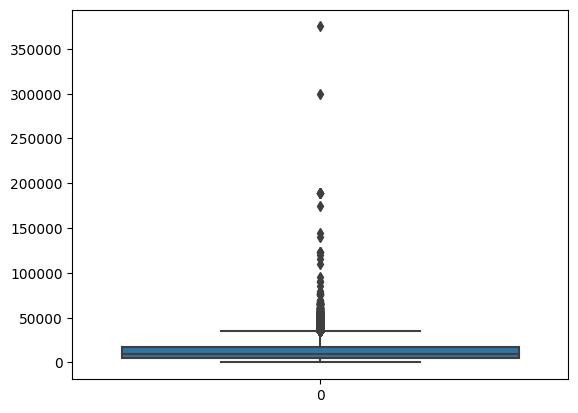

In [51]:
# parameters that will be use: price, age_car, odometer, cylinders, condition
# use boxplot or histograms for `price` column
sns.boxplot(df['price']);

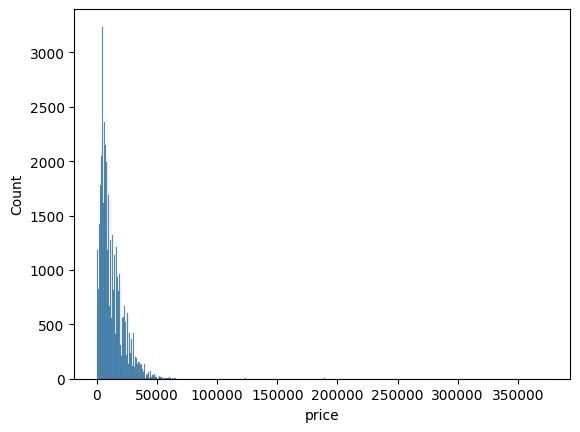

In [52]:
sns.histplot(df['price']);

**Conclusions**

`price` column has a lot of outliers

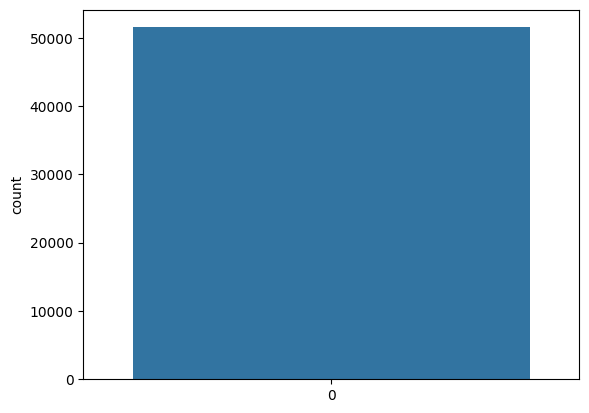

In [53]:
# use countplot or boxplot for `cylinders` column
sns.countplot(df['cylinders']);

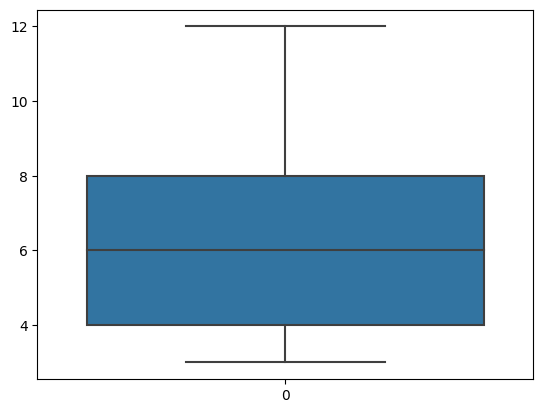

In [54]:
sns.boxplot(df['cylinders']);

**Conclusions**

`cylinders` column doesn't has any outliers

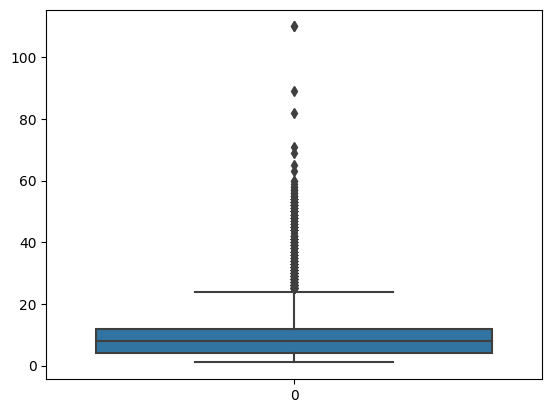

In [55]:
# use histogram or boxplot for `age_car` column
sns.boxplot(df['age_car']);

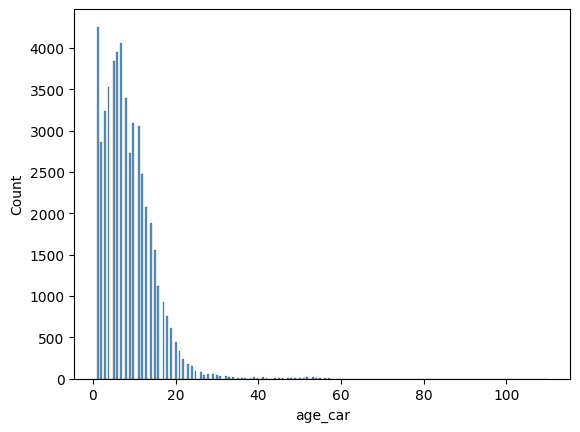

In [56]:
sns.histplot(df['age_car']);

**Conclusions**

`age_car` column has a lot of outliers

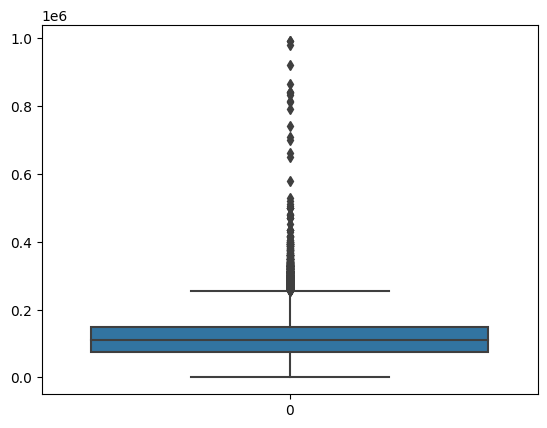

In [57]:
# use histogram or boxplot for `odometer` column
sns.boxplot(df['odometer']);

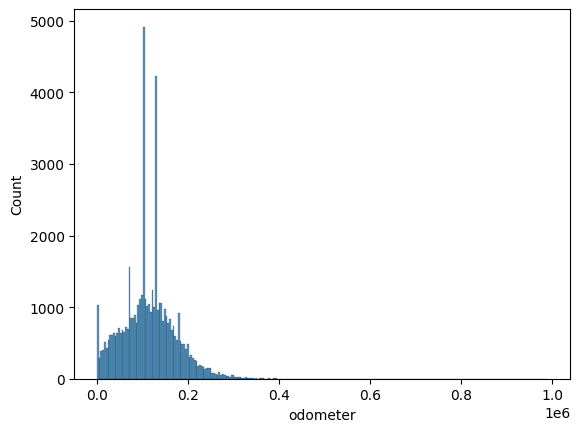

In [58]:
sns.histplot(df['odometer']);

**Conclusions**

`odometer` column has a lot of outliers

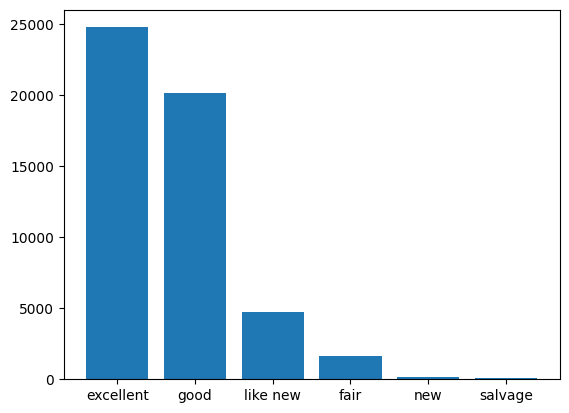

In [59]:
# use boxplot or countplot for `condition` column
condition_counts = df['condition'].value_counts()
plt.bar(condition_counts.index, condition_counts.values)
plt.show()

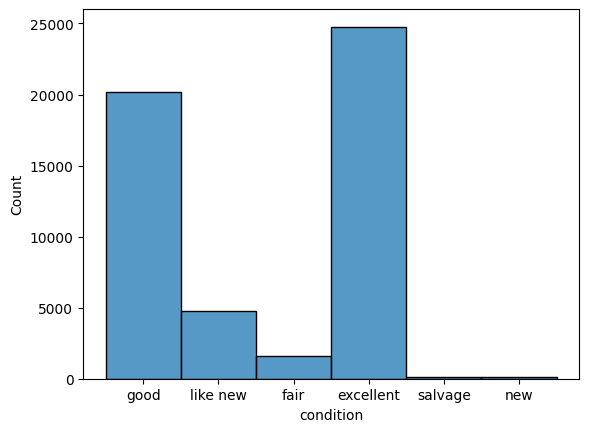

In [60]:
sns.histplot(df['condition']);

**Conclusions**

`condition` column doesn't has any outliers

# Learn And Deal With Outliers

In [61]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,age_car,avg_odometer,condition_group
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,25,6,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,42,10,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,12,3,2019,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14,4,2019,2,40451.500000,3


In [62]:
# Determine the lower and upper bounds of the outliers for the 'price' column
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price  - Q1_price
lower_whisker_price = Q1_price  - (1.5 * IQR_price)
upper_whisker_price = Q3_price  + (1.5 * IQR_price)
print("Lower whisker:", lower_whisker_price)
print("Upper whisker:", upper_whisker_price)

Lower whisker: -12758.5
Upper whisker: 34597.5


In [63]:
# Store data without outliers in a separate DataFrame for the 'price' column
new_df = df[ (df['price']>lower_whisker_price) & (df['price']<upper_whisker_price)].reset_index(drop=True)

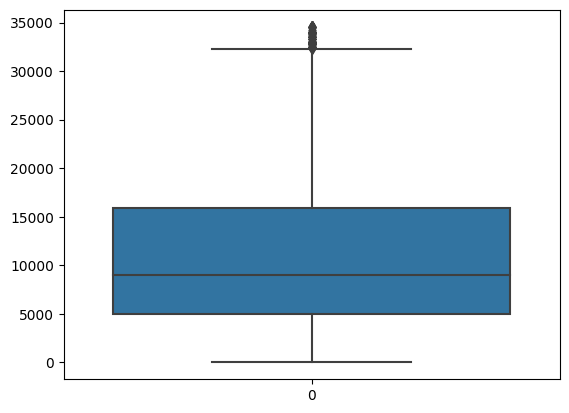

In [64]:
sns.boxplot(new_df['price']);

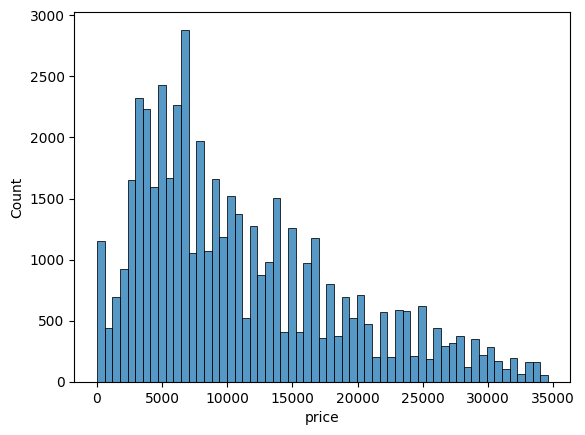

In [65]:
sns.histplot(new_df['price']);

**Conclusion**

In the `price` column, although there are still outliers on the boxplot, it's because we've cleaned up the outlier values that have the farthest gap. Then this outlier can be left alone

In [66]:
# Define lower bounds and upper bounds of outliers for column 'age_car'
Q1_age_car = new_df['age_car'].quantile(0.25)
Q3_age_car = new_df['age_car'].quantile(0.75)
IQR_age_car = Q3_age_car  - Q1_age_car
lower_whisker_age_car = Q1_age_car  - (1.5 * IQR_age_car)
upper_whisker_age_car = Q3_age_car  + (1.5 * IQR_age_car)
print("Lower whisker:", lower_whisker_age_car)
print("Upper whisker:", upper_whisker_age_car)

Lower whisker: -8.0
Upper whisker: 24.0


In [67]:
# Store data without outliers in a separate DataFrame for `age_car` column
new_df2 = new_df[ (new_df['age_car']>lower_whisker_age_car) & (new_df['age_car']<upper_whisker_age_car)].reset_index(drop=True)

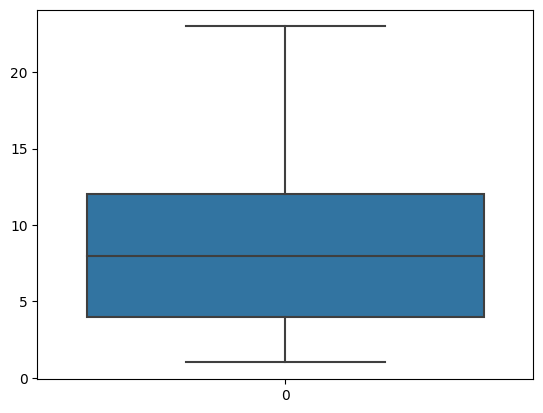

In [68]:
sns.boxplot(new_df2['age_car']);

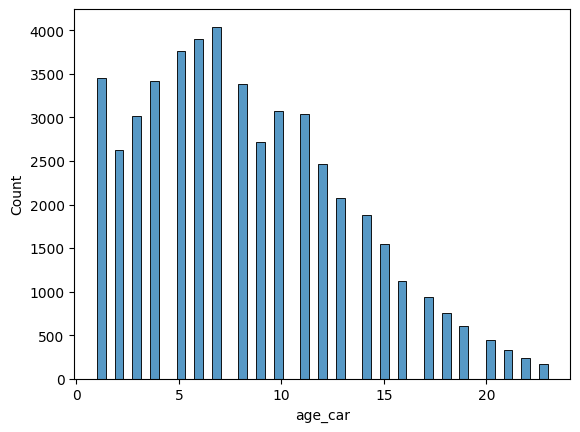

In [69]:
sns.histplot(new_df2['age_car']);

**Conclusion**

In the `age_car` column, although there are still outliers on the boxplot, it's because we've cleaned up the outlier values that have the farthest gap. Then this outlier can be left alone

In [70]:
# Define lower bounds and upper bounds of outliers for `odometer` column
Q1_odometer = new_df2['odometer'].quantile(0.25)
Q3_odometer = new_df2['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer  - Q1_odometer
lower_whisker_odometer = Q1_odometer  - (1.5 * IQR_odometer)
upper_whisker_odometer = Q3_odometer  + (1.5 * IQR_odometer)
print("Lower whisker:", lower_whisker_odometer)
print("Upper whisker:", upper_whisker_odometer)

Lower whisker: -24287.5
Upper whisker: 253012.5


In [71]:
# Store data without outliers in a separate DataFrame for `odometer` column
new_df3 = new_df2[ (new_df2['odometer']>lower_whisker_odometer) & (new_df2['odometer']<upper_whisker_odometer)].reset_index(drop=True)

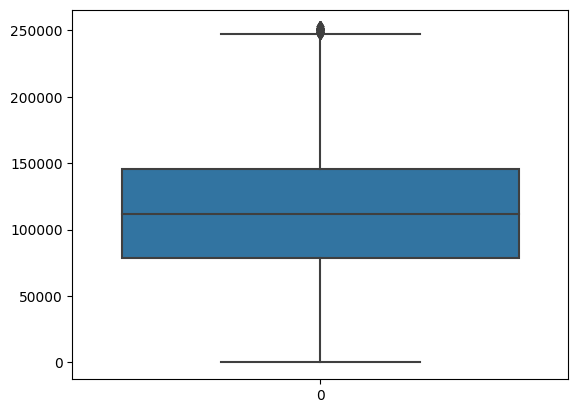

In [72]:
sns.boxplot(new_df3['odometer']);

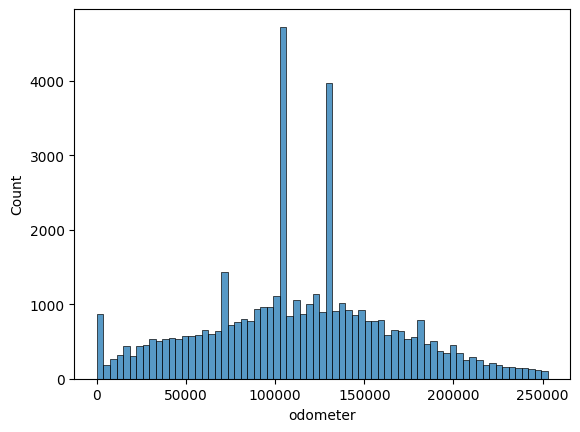

In [73]:
sns.histplot(new_df3['odometer']);

**Conclusion**

In the `odometer` column, although there are still outliers on the boxplot, it's because we've cleaned up the outlier values that have the farthest gap. Then this outlier can be left alone

In [74]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,week_posted,month_posted,year_posted,age_car,avg_odometer,condition_group
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.106511,115199.007278,39.55476,26.873498,6.628491,2018.307462,8.555672,18930.819247,2.637535
std,10040.803015,6.099381,1.576082,60484.868232,28.20427,15.138854,3.474134,0.461447,6.057829,16268.508904,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,13.000000,3.000000,2018.000000,4.000000,10423.000000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,27.000000,7.000000,2018.000000,8.000000,14982.500000,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,40.000000,10.000000,2019.000000,12.000000,21800.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,52.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


In [75]:
new_df3.describe()

,price,model_year,cylinders,odometer,days_listed,week_posted,month_posted,year_posted,age_car,avg_odometer,condition_group
count,48079.000000,48079.000000,48079.00000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,11264.971859,2010.138231,6.04268,113421.385636,39.537220,26.898064,6.633416,2018.306496,8.201148,18732.722085,2.638200
std,7830.493265,4.967123,1.57531,52868.222464,28.206298,15.131759,3.472425,0.461043,4.929208,15408.247607,0.697459
min,1.000000,1995.000000,3.00000,0.000000,0.000000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.00000,78476.000000,19.000000,13.000000,3.000000,2018.000000,4.000000,10542.976190,2.000000
50%,8995.000000,2011.000000,6.00000,111631.000000,33.000000,27.000000,7.000000,2018.000000,7.000000,14890.000000,3.000000
75%,15995.000000,2014.000000,8.00000,145947.500000,53.000000,40.000000,10.000000,2019.000000,11.000000,21524.500000,3.000000
max,34595.000000,2019.000000,12.00000,253000.000000,271.000000,52.000000,12.000000,2019.000000,23.000000,195700.000000,5.000000


**Conclusion**

Comparison of `df` (initial df) and `new_df3` (after filtering)
- In the initial df the number of data rows is 51525, then after being filtered, it becomes 47924
- There are significant differences in the mean, std, 75%, and max values
- The median value (50%) has shifted slightly to 8995

## Learn Core Parameters without Outliers

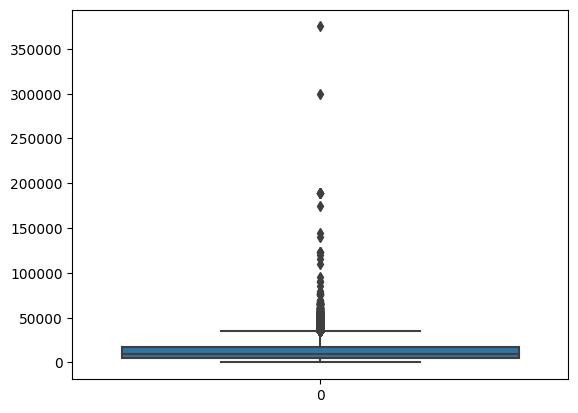

In [76]:
#Data in the `price` column before being filtered
sns.boxplot(df['price']);

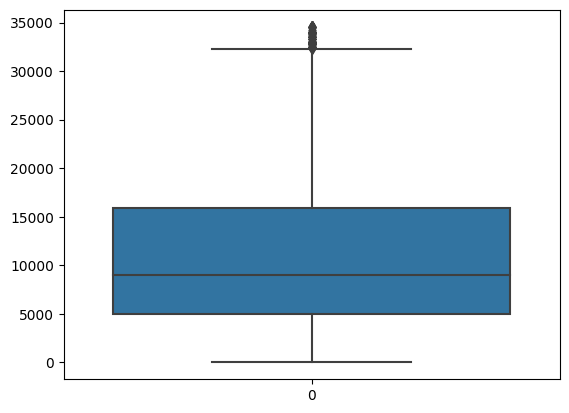

In [77]:
#Data in the `price` column after being filtered
sns.boxplot(new_df['price']);

**Conclusion**

In the `price` column there are so many outliers in the initial dataframe, but after its filtered, the outliers have reduced drastically. Outliers are still visible, but we can leave it alone, because we have cleaned the most extreme gaps.

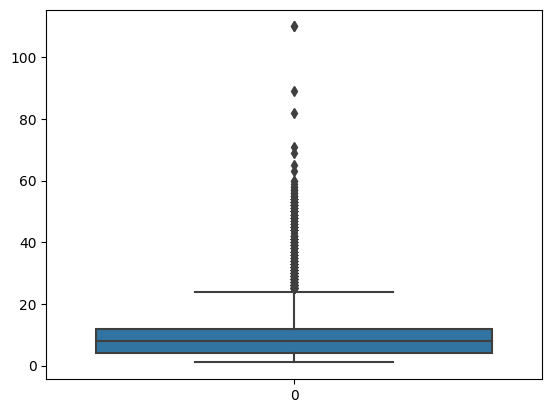

In [78]:
#Data in 'age_car' column before filtering
sns.boxplot(df['age_car']);

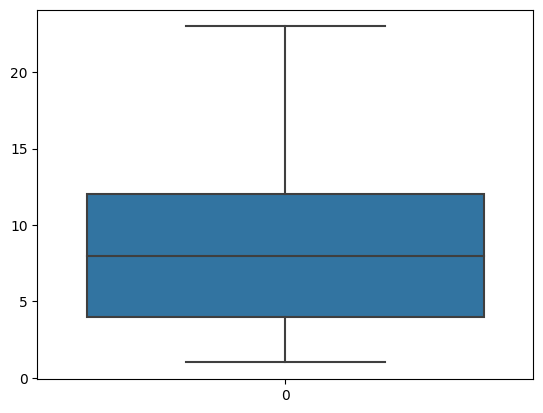

In [79]:
#Data pada kolom 'age_car' setelah di filter
sns.boxplot(new_df2['age_car']);

**Conclusion**

In the `age_car` column there are so many outliers in the initial dataframe, but after its filtered, the outliers have reduced drastically. The outliers are still visible, but we can leave it alone, because we have cleaned the most extreme gaps.

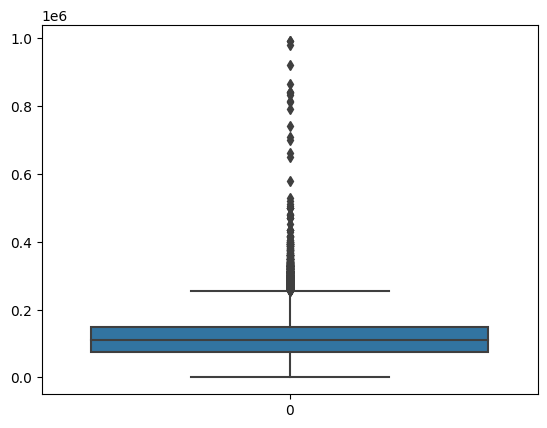

In [80]:
#Data in the 'odometer' column before filtering
sns.boxplot(df['odometer']);

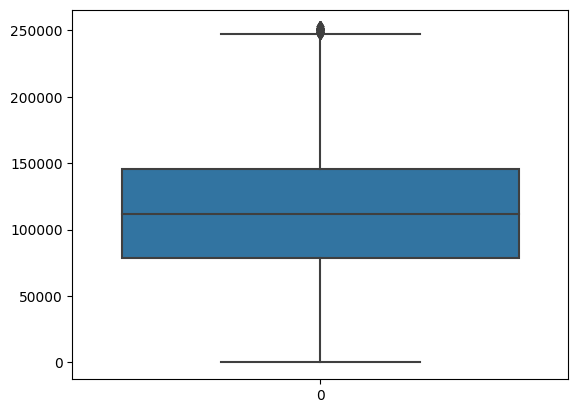

In [81]:
#Data in the 'odometer' column after being filtered
sns.boxplot(new_df3['odometer']);

**Conclusion**

In the `odometer` column there are so many outliers in the initial dataframe, but after its filtered, the outliers have reduced drastically. Outliers are still visible, but we can leave it alone, because we have cleaned the most extreme gaps.

## Ads Validity Period

Learn how many days an ad was served (`days_listed`). Calculate the mean and median. Describe how long an ad is generally displayed. Define when ads are removed quickly, and when ads are served for a very long time.

In [82]:
new_df3['days_listed'].describe()

count    48079.000000
mean        39.537220
std         28.206298
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

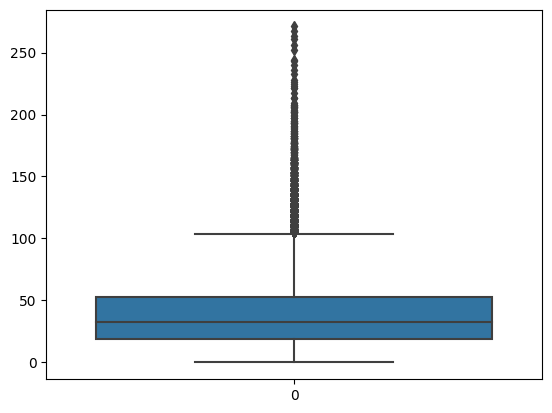

In [83]:
sns.boxplot(new_df3['days_listed']);

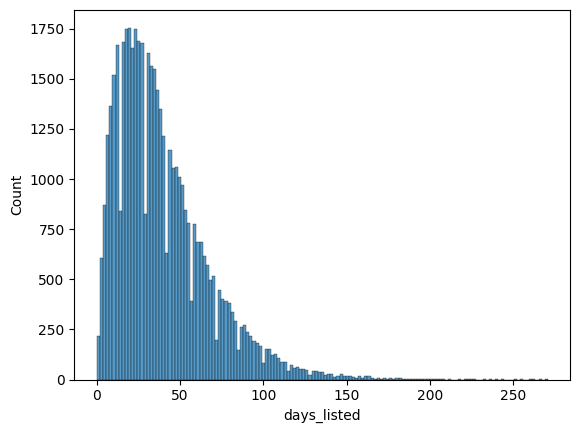

In [84]:
sns.histplot(new_df3['days_listed']);

**Conclusion**
- Based on the data above, it was found that the average ad was served for 39.5 days. Chances are the ad is served on a monthly basis.
- There is a minimum value of 0 days. It is possible that the ad will be deleted immediately after airing, such as goods clearance/flash sale.
- There is a max value of 271 days. It is possible that the ad is used for the promotion of goods that are difficult to sell/has low interest.

## The Average Price of Each Type of The Vehicle

Perform an analysis of the number of advertisements and the average price for each type of vehicle. Make a graph showing the dependence of the number of ads on the type of vehicle. Choose the two types of vehicles with the most number of ads.

In [85]:
agg_group_1 = new_df3.groupby(['type']).agg({
	'price' : 'mean',
	'model' : 'count'
}).rename(columns={
	'price' : 'avg_price',
	'model' : 'count_type'
}).sort_values(by='count_type', ascending=False)

In [86]:
agg_group_1

,avg_price,count_type
type,,
sedan,6990.979135,11982
SUV,10485.101207,11847
truck,15199.516059,11022
pickup,15147.963385,6227
coupe,13548.858706,2010
wagon,8999.886059,1492
mini-van,8072.185802,1141
hatchback,6842.271912,1004
van,8896.221837,577


Text(0, 0.5, 'average price per type')

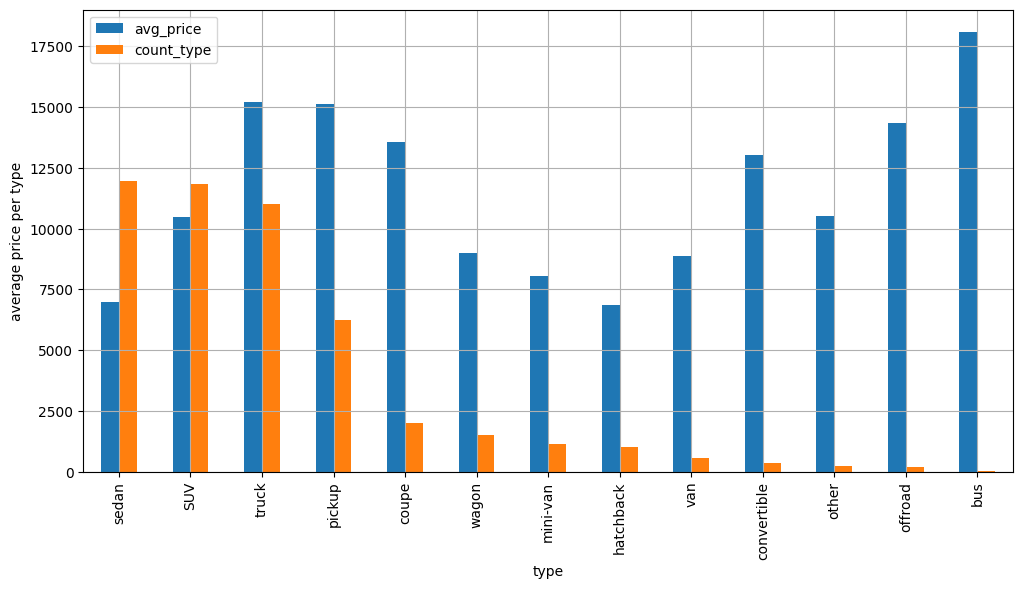

In [87]:
agg_group_1.plot(kind='bar', grid=True, figsize=(12, 6))
plt.ylabel('average price per type')

[Text(0, 0, 'SUV'),
 Text(1, 0, 'pickup'),
 Text(2, 0, 'sedan'),
 Text(3, 0, 'truck'),
 Text(4, 0, 'coupe'),
 Text(5, 0, 'hatchback'),
 Text(6, 0, 'van'),
 Text(7, 0, 'wagon'),
 Text(8, 0, 'mini-van'),
 Text(9, 0, 'convertible'),
 Text(10, 0, 'other'),
 Text(11, 0, 'offroad'),
 Text(12, 0, 'bus')]

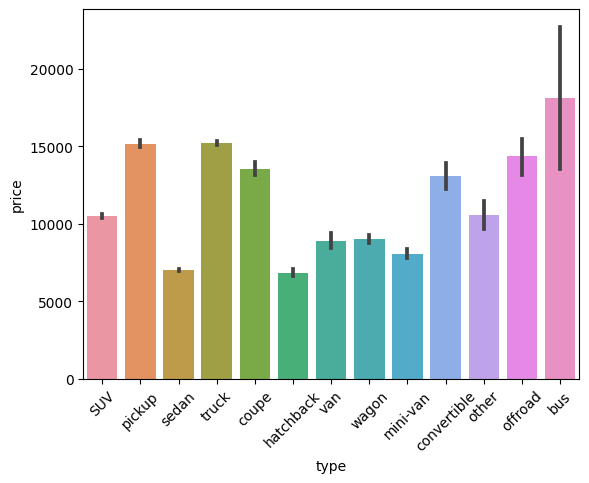

In [88]:
chart = sns.barplot(data=new_df3, x='type', y='price')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

**Conclusion**

- `Sedan` type vehicles have a fairly low average price of 6990 compared to other types, and have the most number of advertisements of all types of vehicles, it has 11982 avg price. It is possible that the sedan style is most in demand by the general public.
- `SUV`s also have the most number of advertisements with 10485, only having a difference of 1497 points compared to sedans which are in the top position. Maybe this type of vehicle is also in great demand by the general public, especially for those who are already married, and SUVs also have a large space for pickup of goods.

## Price Factor

Utilize the correlation matrix and the correlation plot

In [89]:
#The influence of sedan prices
new_df_sedan = new_df3[new_df3['type']=='sedan'].reset_index(drop=True)

In [90]:
new_df_sedan.corr()['price']

price              1.000000
model_year         0.617296
cylinders         -0.038949
odometer          -0.518079
is_4wd             0.039843
days_listed        0.000923
week_posted       -0.021477
month_posted      -0.018336
year_posted        0.015939
age_car           -0.611590
avg_odometer       0.303800
condition_group    0.291602
Name: price, dtype: float64

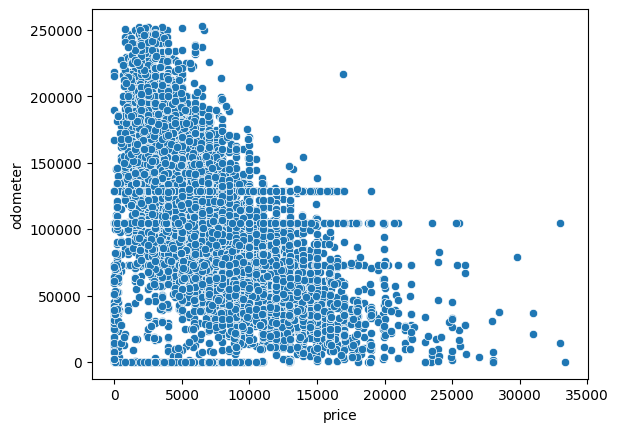

In [91]:
sns.scatterplot(data = new_df_sedan, x='price', y='odometer');

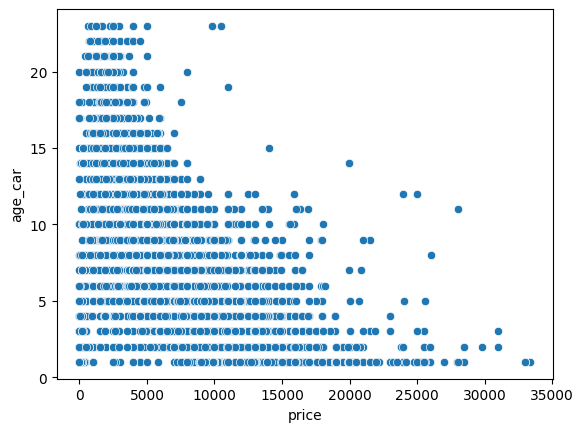

In [92]:
sns.scatterplot(data=new_df_sedan, x='price', y='age_car');

**Conclusion**

- With the `model_year` column it has a positive moderate relationship dependence of 0.58. The younger the `model_year` production year, the more expensive the `price` will be
- With the `age_car` column it has a negative moderate dependency relationship of -0.58. The older the `age_car` car, the cheaper the `price`
- With the `odometer` column it has a negative moderate relationship dependence of -0.52. The higher the odometer mileage the car has, the cheaper the price will be
- With the `condition_group` column having a weak positive dependency relationship of 0.29. The better the condition of the car `condition_group`, the more expensive the `price` will be
- There is no dependence whatsoever with the type of transmission. Because the type of car transmission is an individual preference, it can be assumed that regardless of the type of transmission, the `price` of the cars being sold will remain the same.
- There is no dependence whatsoever on the color of the car. Because the color of a car is an individual preference, it can be assumed that regardless of the color, the `price` of the cars being sold will remain the same.

In [93]:
new_df_sedan['transmission'].value_counts()

automatic    11276
manual         574
other          132
Name: transmission, dtype: int64

Text(0.5, 1.0, 'correlation between price and transmission')

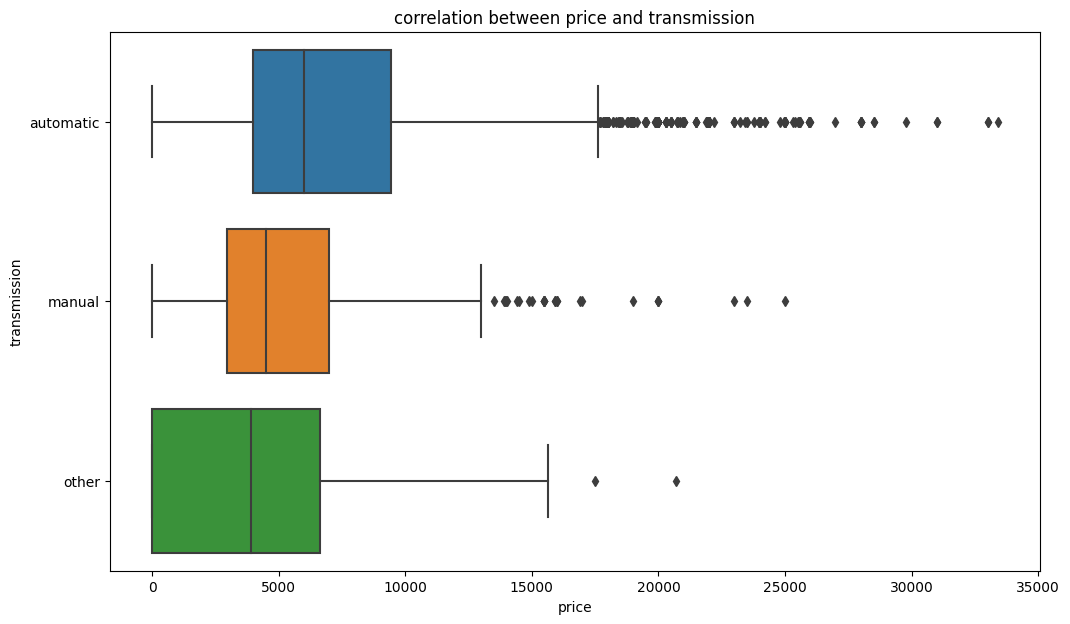

In [94]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=new_df_sedan, x='price', y='transmission')
plt.title('correlation between price and transmission')

In [109]:
new_df_sedan.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,11276.0,7099.415307,4245.504867,1.0,3995.0,6000.0,9450.0,33390.0
manual,574.0,5480.245645,3834.439949,1.0,2950.0,4500.0,6995.0,25000.0
other,132.0,4297.303030,4773.414815,1.0,1.0,3897.5,6637.5,20700.0


**Conclusion**

- Most of the advertisements were dominated by cars with `automatic` transmission, it has 11276

In [95]:
new_df_sedan['paint_color'].value_counts()

unknown    2156
silver     2028
black      1757
grey       1608
white      1484
blue       1218
red         934
custom      296
brown       251
green       197
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

In [96]:
list_include_colors = list(new_df_sedan['paint_color'].value_counts()[:-3].index) # exclude the 3 lowest values

In [97]:
new_df_sedan_colors = new_df_sedan[new_df_sedan['paint_color'].isin(list_include_colors)].reset_index(drop=True) # drop 3 lowest values

Text(0.5, 1.0, 'correlation between price and colors')

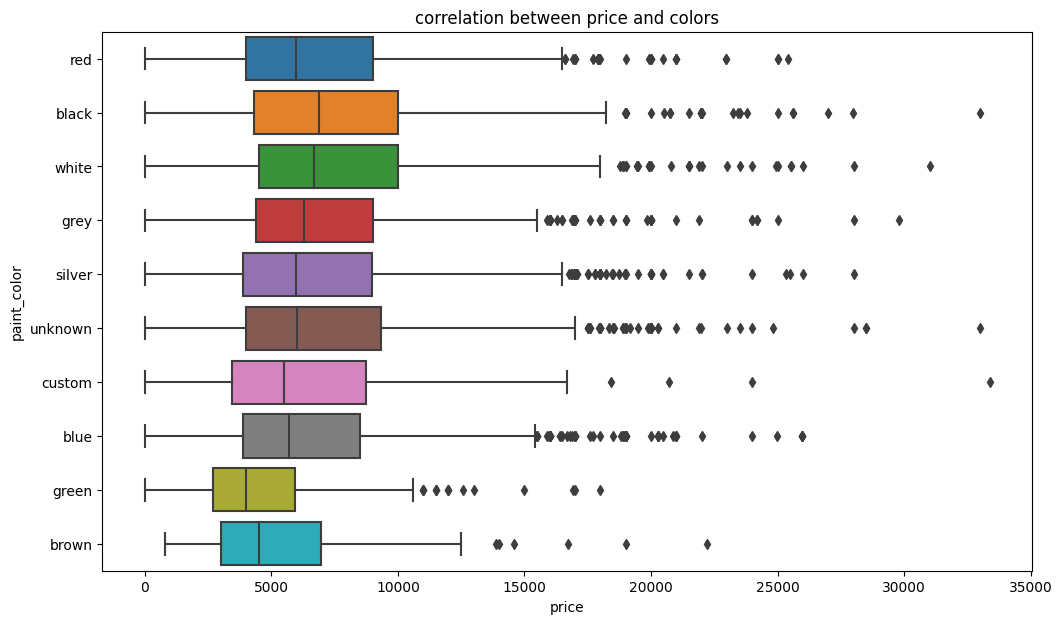

In [98]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=new_df_sedan_colors, x='price', y='paint_color')
plt.title('correlation between price and colors')

**Conclusion**

- There are advertisements served less than 50 times by `purple`, `yellow`, and `orange` colored vehicles. Maybe there are only a few people that interested with these colors, so we don't include the data with that group.

In [99]:
#Influence of SUV prices
new_df_suv = new_df3[new_df3['type']=='SUV'].reset_index(drop=True)

In [100]:
new_df_suv.corr()['price']

price              1.000000
model_year         0.575335
cylinders         -0.006963
odometer          -0.485009
is_4wd             0.113994
days_listed       -0.020740
week_posted       -0.008367
month_posted      -0.007073
year_posted        0.000735
age_car           -0.575081
avg_odometer       0.271524
condition_group    0.258869
Name: price, dtype: float64

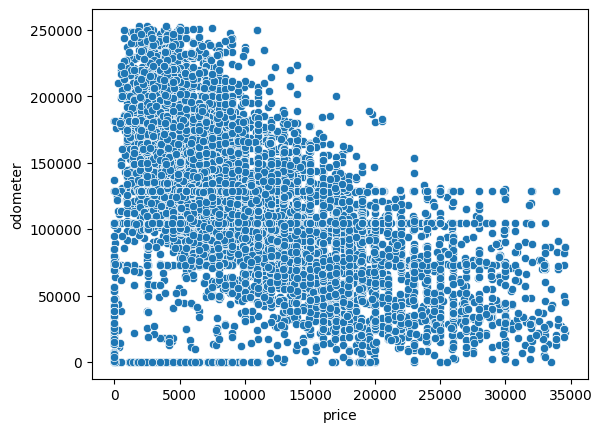

In [101]:
sns.scatterplot(data=new_df_suv, x='price', y='odometer');

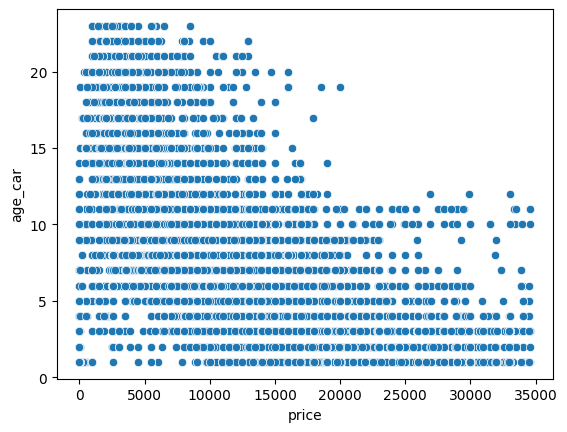

In [102]:
sns.scatterplot(data=new_df_suv, x='price', y='age_car');

**Conclusion**

- With the `model_year` column it has a positive moderate relationship dependence of 0.57. The younger the `model_year` production year, the more expensive the `price` will be
- With the `age_car` column it has a negative moderate dependency relationship of -0.57. The older the `age_car` car, the cheaper the `price`
- The `odometer` column has a weak moderate relationship dependence of -0.48. The higher the odometer mileage the car has, the cheaper the price will be
- With the `condition_group` column having a weak positive relationship dependency of 0.25. The better the condition of the car `condition_group`, the more expensive the `price` will be
- There is no dependence whatsoever with the type of transmission. Because the type of car transmission is an individual preference, it can be assumed that regardless of the type of transmission, the `price` of the cars sold will remain the same.
- There is no dependence whatsoever on the color of the car. Because the color of a car is an individual preference, it can be assumed that whatever the color, the `price` of the cars being sold will remain the same.

In [103]:
new_df_suv['transmission'].value_counts()

automatic    11233
manual         456
other          158
Name: transmission, dtype: int64

Text(0.5, 1.0, 'correlation between price and transmission')

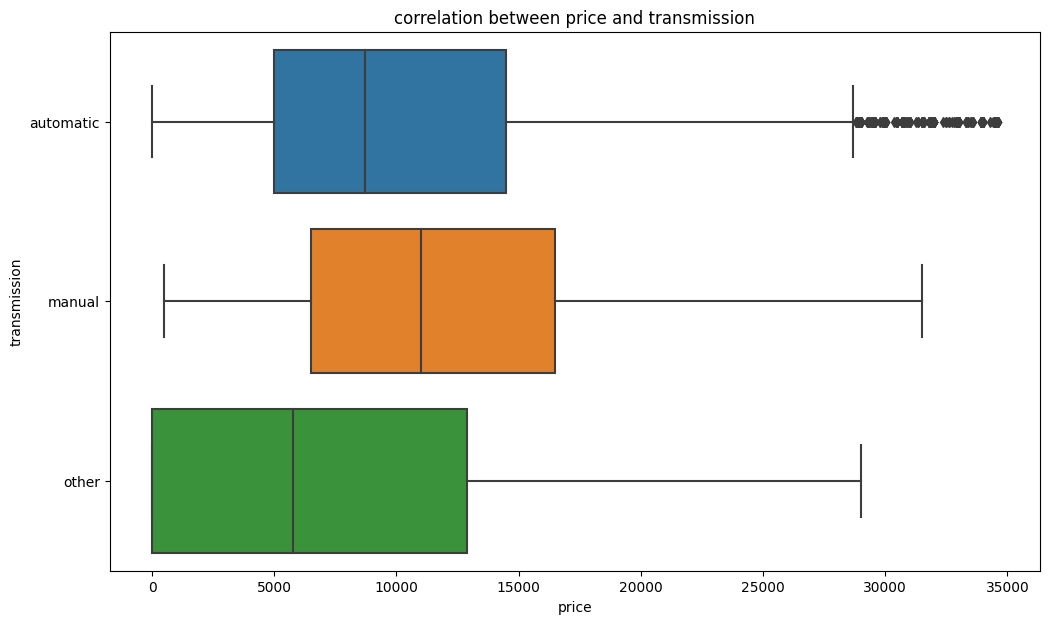

In [104]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=new_df_suv, x='price', y='transmission')
plt.title('correlation between price and transmission')

**Conclusion**

- Most of the advertisements were dominated by cars with `automatic'`transmission, it has 11233

In [105]:
new_df_suv['paint_color'].value_counts()

unknown    2134
black      2085
white      1861
silver     1527
grey       1144
blue       1007
red         868
green       410
brown       350
custom      298
orange       81
yellow       45
purple       37
Name: paint_color, dtype: int64

In [106]:
list_include_colors_suv = list(new_df_suv['paint_color'].value_counts()[:-2].index) # exclude the 2 lowest values

In [107]:
new_df_suv_colors = new_df_suv[new_df_suv['paint_color'].isin(list_include_colors)].reset_index(drop=True) # drop 2 lowest values

Text(0.5, 1.0, 'correlation between price and colors')

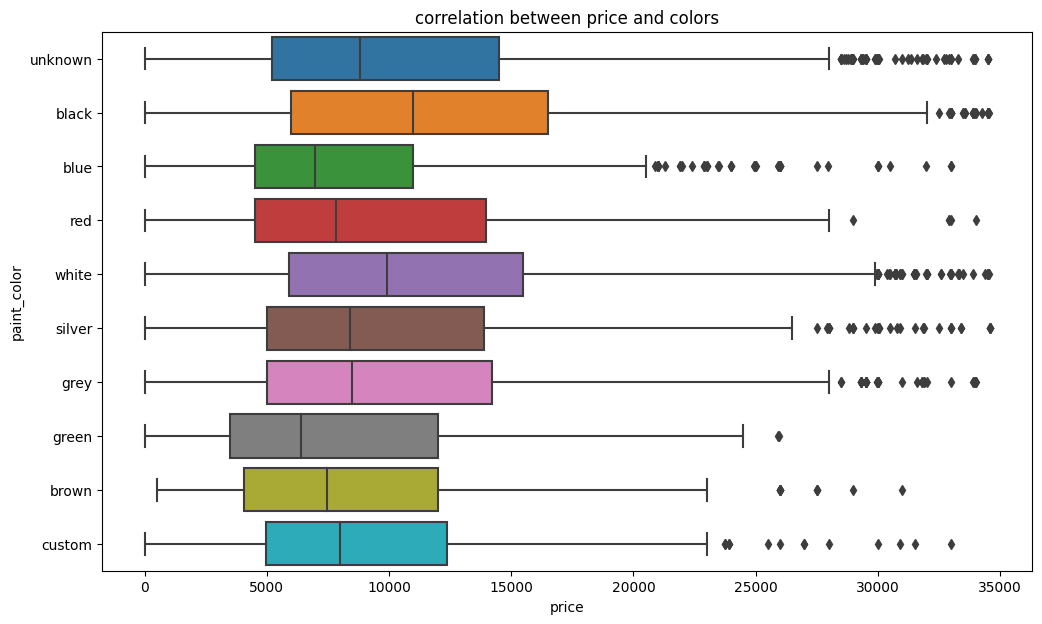

In [108]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=new_df_suv_colors, x='price', y='paint_color')
plt.title('correlation between price and colors')

**Conclusion**

- There are advertisements served less than 50 times by `purple` and `yellow` colored vehicles. Maybe there are only a few people that interested with these colors, so we don't include the data with that group.

# **General Conclusion**

Based on the datasets we used, there are around 51525 rows of data, which some of the data has missing values in the columns as below:

- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

We also found an incorrect datatypes and columns with strange (abnormal) values in the columns as below:
- `model_year`
- `cylinders`
- `is_4wd`
- `odometer`
- `days_listed`

Maybe it could be triggered due to a human error or due to certain conditions. As a solution, we did a boxplot analysis to find out the number of outliers in a datasets. Because the missing data has large number of outliers, we replace the data by using median value.

I also visualize the data using histograms and scatterplots to check the correlation between the data.